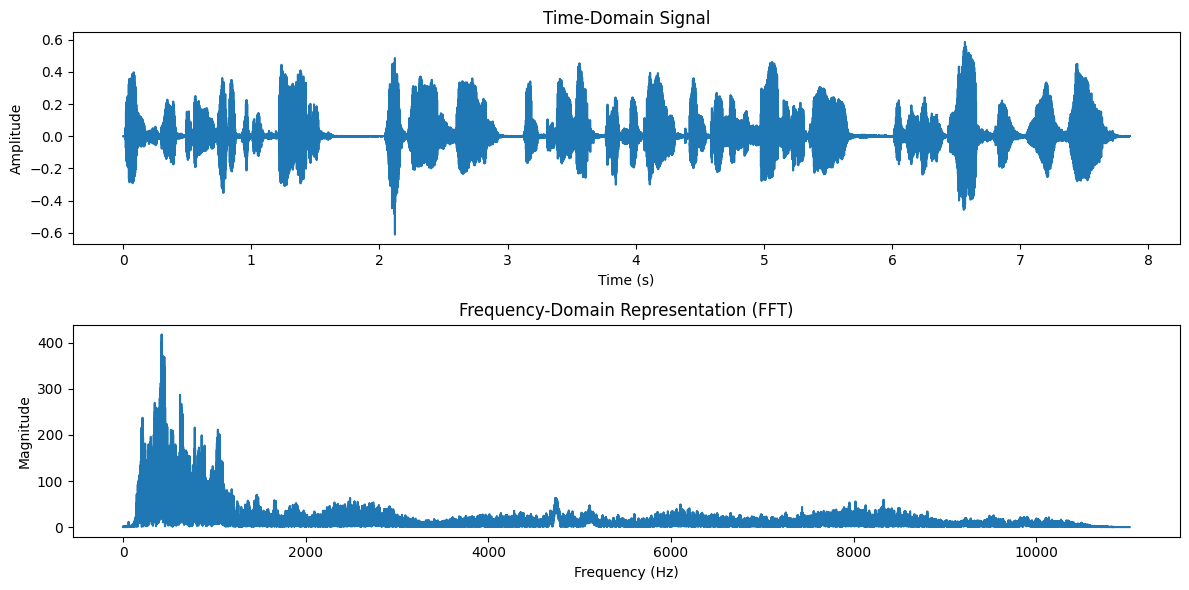

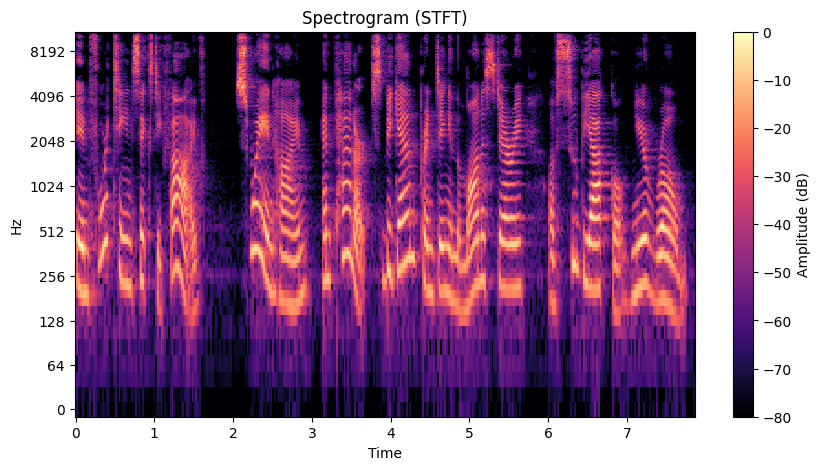

In [5]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/LJ001-0031.wav"
signal, sr = librosa.load(file_path, sr=None)

# Experiment 1(A): Fourier Transform


fft_spectrum = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(fft_spectrum), 1/sr)

magnitude = np.abs(fft_spectrum)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, len(signal) / sr, len(signal)), signal)
plt.title('Time-Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freqs[:len(freqs)//2], magnitude[:len(magnitude)//2]) # positive frequencies
plt.title('Frequency-Domain Representation (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

#  Experiment 1(B): Short-Time Fourier Transform (STFT)

# Computing the  STFT
stft_result = librosa.stft(signal, n_fft=1024, hop_length=512)
stft_magnitude = np.abs(stft_result)

# Converting to decibels
stft_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(stft_db, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar(label='Amplitude (dB)')
plt.title('Spectrogram (STFT)')
plt.show()


# second part


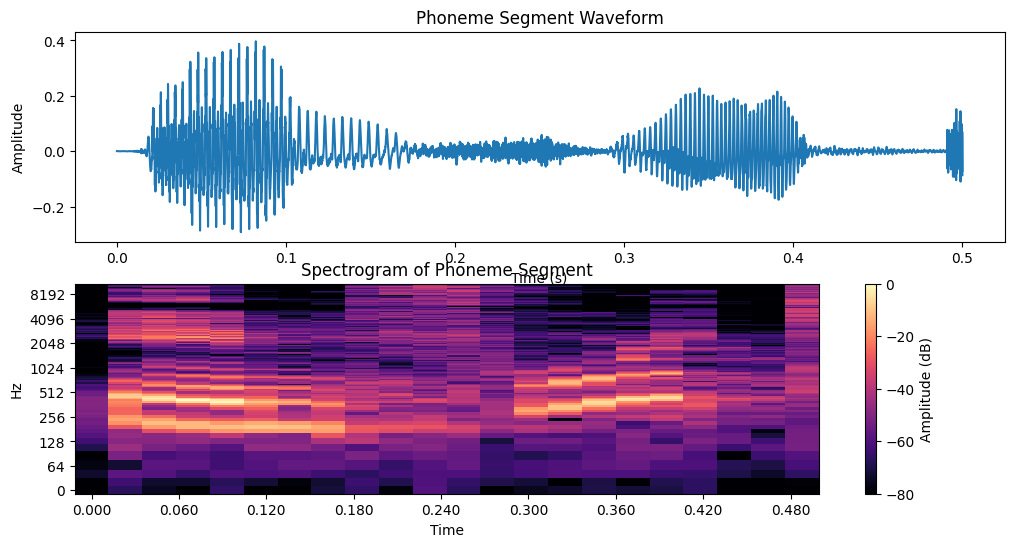

Energy in low-frequency (vowels): 275579.19
Energy in high-frequency (fricatives): 26042.65
Energy ratio (vowels to consonants): 10.58


In [6]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/LJ001-0031.wav"
signal, sr = librosa.load(file_path, sr=None)

# Extracting a phonemene first 0.5 seconds)
start_sample = 0
end_sample = int(0.5 * sr)
phoneme_segment = signal[start_sample:end_sample]


plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
time_axis = np.linspace(0, len(phoneme_segment) / sr, len(phoneme_segment))
plt.plot(time_axis, phoneme_segment)
plt.title('Phoneme Segment Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


stft_result = librosa.stft(phoneme_segment, n_fft=1024, hop_length=512)
stft_magnitude = np.abs(stft_result)
stft_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.subplot(2, 1, 2)
librosa.display.specshow(stft_db, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar(label='Amplitude (dB)')
plt.title('Spectrogram of Phoneme Segment')
plt.show()

# Computing the Energy in Different Frequency Bands

# Computing the  STFT for full signal
stft_result_full = librosa.stft(signal, n_fft=1024, hop_length=512)
stft_magnitude_full = np.abs(stft_result_full)


freq_bins = librosa.fft_frequencies(sr=sr, n_fft=1024)


low_freq_indices = np.where((freq_bins >= 300) & (freq_bins <= 3000))[0]
high_freq_indices = np.where((freq_bins >= 4000) & (freq_bins <= 8000))[0]


low_freq_energy = np.sum(stft_magnitude_full[low_freq_indices, :]**2)
high_freq_energy = np.sum(stft_magnitude_full[high_freq_indices, :]**2)

# Computing the energy ratio between vowels (low-freq) and fricatives (high-freq)
energy_ratio = low_freq_energy / high_freq_energy if high_freq_energy != 0 else np.inf

print(f"Energy in low-frequency (vowels): {low_freq_energy:.2f}")
print(f"Energy in high-frequency (fricatives): {high_freq_energy:.2f}")
print(f"Energy ratio (vowels to consonants): {energy_ratio:.2f}")
